In [7]:
import numpy as np
import skimage
import skimage.io
import matplotlib.pyplot as plt

In [8]:
PATH = "output_pgm/14.pgm"

In [9]:
im = skimage.io.imread(PATH)
im.shape, im.dtype, im.max(), im.min()

((864, 720), dtype('uint8'), 252, 29)

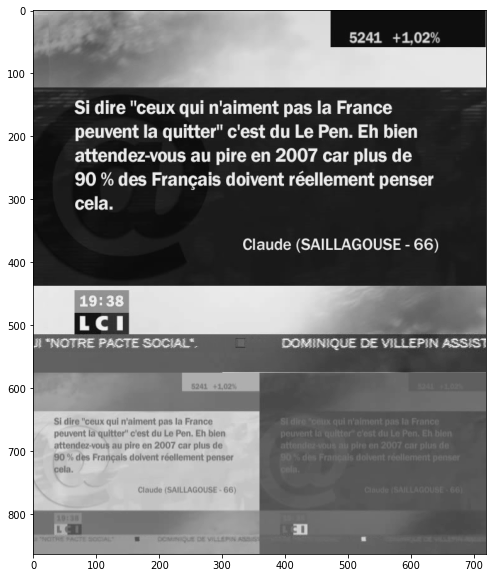

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray', interpolation=None)

In [11]:
# We know the image was encoded in YUV sample mode 4:2:0
final_img_shape = int(im.shape[0] * 2 / 3), im.shape[1]
y_shape = final_img_shape
u_shape = int(im.shape[0] * 1 / 3), im.shape[1] // 2
v_shape = int(im.shape[0] * 1 / 3), im.shape[1] // 2

assert y_shape[0] + u_shape[0] == im.shape[0]

y_shape, u_shape, v_shape

((576, 720), (288, 360), (288, 360))

In [12]:
y_img = im[:y_shape[0], :y_shape[1]]
u_img = im[y_shape[0]:, :u_shape[1]]
v_img = im[y_shape[0]:, u_shape[1]:]
y_img.shape, u_img.shape, v_img.shape

((576, 720), (288, 360), (288, 360))

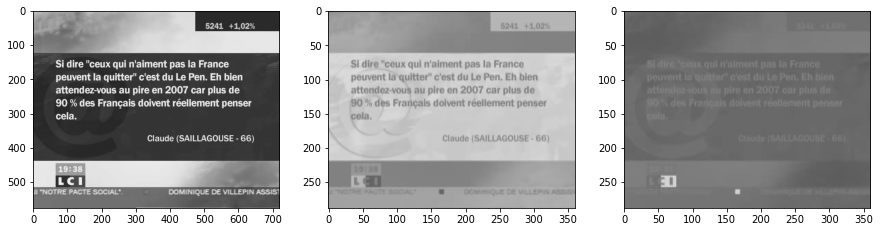

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
ax[0].imshow(y_img, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(u_img, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(v_img, cmap='gray', vmin=0, vmax=255)

In [14]:
# Upscale U and V
tmp_u_img = np.zeros_like(y_img)
tmp_u_img[::2,::2] = u_img[:,:]
tmp_u_img[1::2,1::2] = u_img[:,:]
tmp_u_img[1::2,::2] = u_img[:,:]
tmp_u_img[0::2,1::2] = u_img[:,:]
u_img = tmp_u_img


tmp_v_img = np.zeros_like(y_img)
tmp_v_img[::2,::2] = v_img[:,:]
tmp_v_img[1::2,1::2] = v_img[:,:]
tmp_v_img[1::2,::2] = v_img[:,:]
tmp_v_img[0::2,1::2] = v_img[:,:]
v_img = tmp_v_img

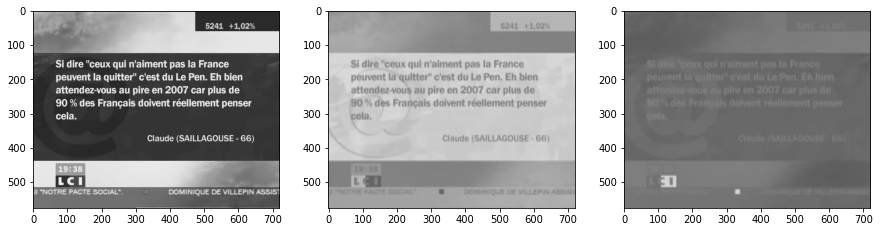

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
ax[0].imshow(y_img, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(u_img, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(v_img, cmap='gray', vmin=0, vmax=255)

In [16]:
y_img = y_img.astype(float)
u_img = u_img.astype(float)
v_img = v_img.astype(float)

$
Y(y, x) \in [0, 1]
$

$
U_{max} = 0.436\\
U(y, x) \in [-U_{max}, U_{max}]
$

$
V_{max} = 0.615\\
V(y, x) \in [-V_{max}, V_{max}]
$


In [17]:
y_img /= 255.

u_max = 0.436
u_img = u_img / 255. * 2 * u_max - u_max 
v_max = 0.615
v_img = v_img / 255. * 2 * v_max - v_max 


In [18]:
yuv_img = np.concatenate((np.expand_dims(y_img, axis=-1),
                          np.expand_dims(u_img, axis=-1),
                          np.expand_dims(v_img, axis=-1)), axis=-1)
yuv_img.shape, yuv_img.dtype

((576, 720, 3), dtype('float64'))

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4a71024cb613a4bd1a31cdecb279b35f4e9a15e3)

In [19]:
yuv2rgb = np.array([[1, 0, 1.13983],
                     [1., -0.39465, -0.58060],
                     [1.0, 2.03211, 0.]])
yuv2rgb.shape, yuv2rgb.dtype

((3, 3), dtype('float64'))

In [20]:
# rgb_img = skimage.color.yuv2rgb(yuv_img)
# rgb_img.shape
rgb_img = yuv2rgb @ yuv_img.reshape((-1, 3)).T
rgb_img = rgb_img.T.reshape(yuv_img.shape)
rgb_img.shape

(576, 720, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


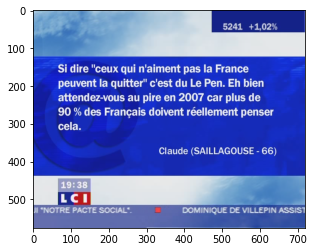

In [21]:
plt.imshow(rgb_img)

In [22]:
skimage.io.imsave("output.ppm", rgb_img)

Lossy conversion from float64 to uint8. Range [0.00015927058823530764, 1.4405097796078432]. Convert image to uint8 prior to saving to suppress this warning.


In [23]:
def single_yuv2rgb(im):
    final_img_shape = int(im.shape[0] * 2 / 3), im.shape[1]
    y_shape = final_img_shape
    u_shape = int(im.shape[0] * 1 / 3), im.shape[1] // 2
    v_shape = int(im.shape[0] * 1 / 3), im.shape[1] // 2

    assert y_shape[0] + u_shape[0] == im.shape[0]

    y_img = im[:y_shape[0], :y_shape[1]]
    u_img = im[y_shape[0]:, :u_shape[1]]
    v_img = im[y_shape[0]:, u_shape[1]:]

    tmp_u_img = np.zeros_like(y_img)
    tmp_u_img[::2,::2] = u_img[:,:]
    tmp_u_img[1::2,1::2] = u_img[:,:]
    tmp_u_img[1::2,::2] = u_img[:,:]
    tmp_u_img[0::2,1::2] = u_img[:,:]
    u_img = tmp_u_img


    tmp_v_img = np.zeros_like(y_img)
    tmp_v_img[::2,::2] = v_img[:,:]
    tmp_v_img[1::2,1::2] = v_img[:,:]
    tmp_v_img[1::2,::2] = v_img[:,:]
    tmp_v_img[0::2,1::2] = v_img[:,:]
    v_img = tmp_v_img

    y_img = y_img.astype(float)
    u_img = u_img.astype(float)
    v_img = v_img.astype(float)

    y_img /= 255.

    u_max = 0.436
    u_img = u_img / 255. * 2 * u_max - u_max
    v_max = 0.615
    v_img = v_img / 255. * 2 * v_max - v_max

    yuv_img = np.concatenate((np.expand_dims(y_img, axis=-1),
                              np.expand_dims(u_img, axis=-1),
                              np.expand_dims(v_img, axis=-1)), axis=-1)
    yuv2rgb = np.array([[1, 0, 1.13983],
                        [1., -0.39465, -0.58060],
                        [1.0, 2.03211, 0.]])

    rgb_img = yuv2rgb @ yuv_img.reshape((-1, 3)).T
    rgb_img = rgb_img.T.reshape(yuv_img.shape)
    return rgb_img

def yuv2rgb(im_path, out_path=None, progressive=False):
    # FIXME progressive
    im = skimage.io.imread(im_path)

    out_path = "output" if out_path is None else out_path

    if progressive:
        rgb_img = single_yuv2rgb(im)
        skimage.io.imsave(out_path + ".ppm", rgb_img)
    else:
        # FIXME: copy lines sometimes from top to bottom or from bottom to top
        # top field first
        # Convert
        rgb_img_1 = single_yuv2rgb(im[::2])
        # Copy lines
        # rgb_img_1 = np.empty((tmp_rgb_img_1.shape[0]*2, tmp_rgb_img_1.shape[1], 3))
        # rgb_img_1[::2, :, :] = tmp_rgb_img_1[:]
        # rgb_img_1[1::2, :, :] = tmp_rgb_img_1[:]
        skimage.io.imsave(out_path + "1.ppm", rgb_img_1)

        # bottom field
        rgb_img_2 = single_yuv2rgb(im[1::2])
        # Copy lines
        # rgb_img_2 = np.empty((tmp_rgb_img_2.shape[0]*2, tmp_rgb_img_2.shape[1], 3))
        # rgb_img_2[::2, :, :] = tmp_rgb_img_2[:]
        # rgb_img_2[1::2, :, :] = tmp_rgb_img_2[:]
        skimage.io.imsave(out_path + "2.ppm", rgb_img_2)

In [24]:
yuv2rgb("output_pgm/14.pgm", "output")

Lossy conversion from float64 to uint8. Range [0.02623831372549016, 1.4570901720784313]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0009383433333333076, 1.4770431119999998]. Convert image to uint8 prior to saving to suppress this warning.
